# Analiza podatkov

V tej datoteki bom analizirala podatke, pridobljene s spletne strani myanimelist.net.

Ne pozabi spisati markdown blokov in README.md datoteke :)

In [1]:
import pandas as pd

pd.set_option("display.max_rows", 10)

%matplotlib inline 

ANIME = pd.read_csv("anime.csv", index_col="id") 
VSI_ANIME = pd.read_csv("vsi_anime.csv", index_col="id")
LIKI = pd.read_csv("liki.csv", index_col="id_lika")
ZANRI = pd.read_csv("anime_zanri.csv")
ANIME_LIKI = pd.read_csv("anime_liki.csv")
FRANSIZE = pd.read_csv("anime_fransize.csv")

In [2]:
VSI_ANIME

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
3579,Getter Robo,51,spring,1974,Manga,25,6.70,8804,Shounen,['Mecha'],"['Action', 'Sci-Fi']",['Toei Animation']
6383,Chargeman Ken!,65,spring,1974,Original,6,4.56,4518,NG,[],"['Action', 'Adventure', 'Sci-Fi']",['Knack Productions']
3388,Majokko Megu-chan,72,spring,1974,Original,25,6.67,4010,NG,['Mahou Shoujo'],[],['Toei Animation']
2836,Chiisana Viking Vickie,78,spring,1974,Novel,24,6.67,3948,Kids,['Historical'],"['Adventure', 'Comedy']",['Nippon Animation']
8139,Shin Minashigo Hutch,26,spring,1974,NaN,24,6.27,1542,NG,[],"['Adventure', 'Comedy', 'Drama']",['Tatsunoko Production']
...,...,...,...,...,...,...,...,...,...,...,...,...
59505,Kankin Kuiki Level X,NG,fall,2024,Web manga,NG,NaN,272,NG,[],"['Horror', 'Mystery']",[]
59499,Asatir 2: Mirai no Mukashi Banashi,NG,fall,2024,Original,NG,NaN,191,NG,[],['Adventure'],[]
58827,Okaimono Panda!,NG,fall,2024,Other,NG,NaN,117,NG,['Anthropomorphic'],[],['Shin-Ei Animation']


Splošno

In [ ]:
# Nekrižane: Ocene po številih zaokroženih, ocene po letih, najboljših nekaj
# Ocene po izvornem, demografika, žanri, najpopularnejše teme, studii, popularnost križana s characterji, demo, žanri. Franšize.
# Kakšni cross-reference-i npr. demografika-žanri-nekaj. Pač nekaj drugega med sabo kot le ocena. Število epizod v franšizi ... (sam zato nimam dost podatkov ...)

In [3]:
print(float(VSI_ANIME["ocena"].mean())) #Kako se neupoštevajo NaN?

6.854301446771755


In [4]:
filter_nan = VSI_ANIME["ocena"].notna()
ocene = VSI_ANIME[filter_nan]
print(sum(filter_nan))
ocene

4631


,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
3579,Getter Robo,51,spring,1974,Manga,25,6.70,8804,Shounen,['Mecha'],"['Action', 'Sci-Fi']",['Toei Animation']
6383,Chargeman Ken!,65,spring,1974,Original,6,4.56,4518,NG,[],"['Action', 'Adventure', 'Sci-Fi']",['Knack Productions']
3388,Majokko Megu-chan,72,spring,1974,Original,25,6.67,4010,NG,['Mahou Shoujo'],[],['Toei Animation']
2836,Chiisana Viking Vickie,78,spring,1974,Novel,24,6.67,3948,Kids,['Historical'],"['Adventure', 'Comedy']",['Nippon Animation']
8139,Shin Minashigo Hutch,26,spring,1974,NaN,24,6.27,1542,NG,[],"['Adventure', 'Comedy', 'Drama']",['Tatsunoko Production']
...,...,...,...,...,...,...,...,...,...,...,...,...
56189,Grendizer U,NG,summer,2024,Manga,NG,6.05,6030,NG,['Mecha'],"['Action', 'Sci-Fi']",['Gaina']
54730,Kinnikuman: Kanpeki Chоujin Shiso-hen,11,summer,2024,Manga,23,6.59,5896,Shounen,['Combat Sports'],"['Comedy', 'Sports']",['Production I.G']
59010,Yami Shibai 13,NG,summer,2024,Original,NG,5.97,2335,NG,[],"['Avant Garde', 'Horror', 'Supernatural']",['ILCA']


In [5]:
def zaokrozi(x):
    return round(x, 1)

zaokrozena_ocena = ocene["ocena"].apply(zaokrozi)  #Bolj elegantna rešitev?
zaokrozena_ocena

id
3579     6.7
6383     4.6
3388     6.7
2836     6.7
8139     6.3
        ... 
56189    6.0
54730    6.6
59010    6.0
54143    6.6
58926    6.0
Name: ocena, Length: 4631, dtype: float64

In [6]:
podtabela = ocene[["naslov", "leto premiere", "ocena"]].copy()
podtabela["zaokrožena ocena"] = zaokrozena_ocena
podtabela

,naslov,leto premiere,ocena,zaokrožena ocena
id,,,,
3579,Getter Robo,1974,6.70,6.7
6383,Chargeman Ken!,1974,4.56,4.6
3388,Majokko Megu-chan,1974,6.67,6.7
2836,Chiisana Viking Vickie,1974,6.67,6.7
8139,Shin Minashigo Hutch,1974,6.27,6.3
...,...,...,...,...
56189,Grendizer U,2024,6.05,6.0
54730,Kinnikuman: Kanpeki Chоujin Shiso-hen,2024,6.59,6.6
59010,Yami Shibai 13,2024,5.97,6.0


In [7]:
po_ocenah = podtabela.groupby("zaokrožena ocena").size()
po_ocenah

zaokrožena ocena
2.9     1
3.0     1
3.3     4
3.8     3
3.9     2
       ..
8.8    15
8.9     7
9.0     7
9.1     4
9.3     1
Length: 56, dtype: int64

<Axes: title={'center': 'Razporeditev zaokroženih ocen'}, xlabel='zaokrožena ocena', ylabel='število animejev'>

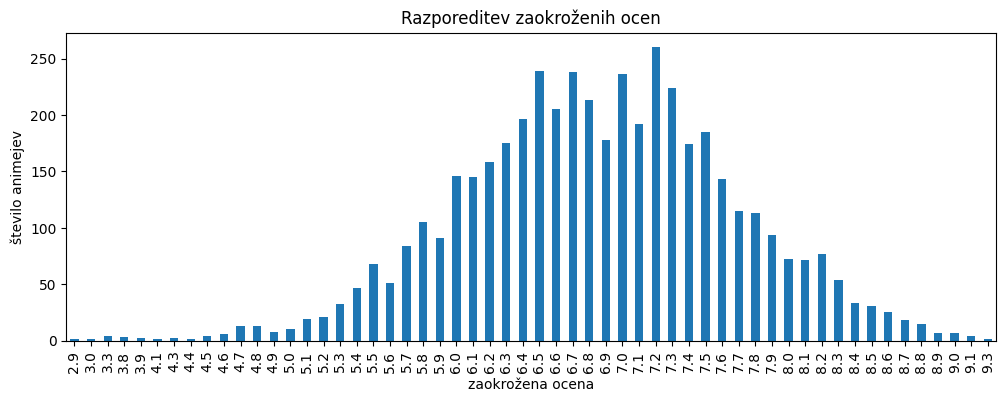

In [8]:
po_ocenah.plot.bar(title="Razporeditev zaokroženih ocen", xlabel= "zaokrožena ocena", ylabel="število animejev", figsize=(12, 4)) #Dam na manj? Na koliko manj?  Ali lahko razširim graf?

<Axes: xlabel='leto premiere'>

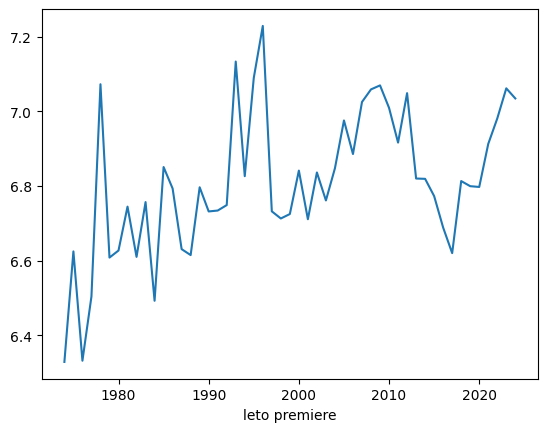

In [9]:
ocene_po_letih = ocene.groupby("leto premiere")["ocena"].mean()
ocene_po_letih.plot()

In [161]:
ocene_po_letih.sort_values(ascending=False).tail(10)

leto premiere
1980    6.627083
1975    6.624706
2017    6.620093
1988    6.614839
1982    6.610000
1979    6.608182
1977    6.504000
1984    6.492500
1976    6.332000
1974    6.328750
Name: ocena, dtype: float64

In [168]:
ocene_po_letih.sort_values(ascending=False).head(10)

leto premiere
1996    7.228529
1993    7.133158
1995    7.089394
1978    7.072353
2009    7.069280
2023    7.061389
2008    7.058593
2012    7.048456
2024    7.034331
2007    7.024815
Name: ocena, dtype: float64

In [164]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 2017].sort_values("ocena", ascending=False).head(10)

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
34096,Gintama.,12,winter,2017,Manga,24,8.98,318344,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Bandai Namco Pictures']
35180,3-gatsu no Lion 2nd Season,22,fall,2017,Manga,25,8.92,406314,Seinen,"['Childcare', 'Strategy Game']",['Drama'],['Shaft']
33095,Shouwa Genroku Rakugo Shinjuu: Sukeroku Futata...,12,winter,2017,Manga,24,8.71,189304,Josei,"['Adult Cast', 'Historical', 'Love Polygon', '...",['Drama'],['Studio Deen']
34599,Made in Abyss,13,summer,2017,Web manga,25,8.64,1400138,NG,['Gore'],"['Adventure', 'Drama', 'Fantasy', 'Mystery', '...",['Kinema Citrus']
34591,Natsume Yuujinchou Roku,11,spring,2017,Manga,23,8.61,188503,Shoujo,"['Iyashikei', 'Mythology']","['Slice of Life', 'Supernatural']",['Shuka']
25777,Shingeki no Kyojin Season 2,12,spring,2017,Manga,24,8.52,2753457,Shounen,"['Gore', 'Military', 'Survival']","['Action', 'Drama', 'Suspense']",['Wit Studio']
35843,Gintama.: Porori-hen,13,fall,2017,Manga,23,8.52,204226,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Bandai Namco Pictures']
35557,Houseki no Kuni,12,fall,2017,Manga,24,8.39,468429,Seinen,['Anthropomorphic'],"['Action', 'Drama', 'Fantasy', 'Mystery']",['Orange']
32937,Kono Subarashii Sekai ni Shukufuku wo! 2,10,winter,2017,Light novel,23,8.25,1534402,NG,"['Isekai', 'Parody']","['Adventure', 'Comedy', 'Fantasy']",['Studio Deen']


In [166]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 2017].groupby("demografika").size().sort_values(ascending=False)

demografika
NG         163
Kids        55
Shounen     31
Seinen      18
Josei        4
Shoujo       4
dtype: int64

In [175]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 2024].groupby("demografika").size().sort_values(ascending=False)

demografika
NG         160
Shounen     47
Seinen      19
Kids        10
Shoujo       9
Josei        2
dtype: int64

In [179]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 2017].groupby("žanri").size().sort_values(ascending=False).head(10)

žanri
['Comedy']                            36
[]                                    25
['Action', 'Sci-Fi']                  11
['Action', 'Adventure', 'Fantasy']     9
['Action']                             9
['Comedy', 'Slice of Life']            8
['Comedy', 'Fantasy']                  8
['Slice of Life']                      8
['Action', 'Fantasy']                  7
['Fantasy']                            6
dtype: int64

In [178]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 2024].groupby("žanri").size().sort_values(ascending=False).head(10)

žanri
['Action', 'Adventure', 'Fantasy']    30
['Comedy']                            20
['Action']                            12
[]                                    12
['Action', 'Fantasy']                 11
['Comedy', 'Romance']                 10
['Action', 'Sci-Fi']                   7
['Adventure', 'Fantasy']               7
['Comedy', 'Fantasy']                  6
['Romance']                            6
dtype: int64

In [170]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 1996].groupby("demografika").size().sort_values(ascending=False)

demografika
NG         18
Shounen     9
Shoujo      5
Kids        2
Josei       1
Seinen      1
dtype: int64

In [174]:
VSI_ANIME[VSI_ANIME["leto premiere"] == 1996].sort_values("ocena", ascending=False).head(10)

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
45,Rurouni Kenshin: Meiji Kenkaku Romantan,94,winter,1996,Manga,25,8.28,499430,Shounen,"['Historical', 'Samurai']","['Action', 'Comedy', 'Romance']",[]
235,Meitantei Conan,NG,winter,1996,Manga,NG,8.17,352257,Shounen,['Detective'],"['Adventure', 'Comedy', 'Mystery']",['TMS Entertainment']
1486,Kodomo no Omocha (TV),102,spring,1996,Manga,24,8.05,70278,Shoujo,"['Love Polygon', 'Showbiz']","['Comedy', 'Drama', 'Romance']",['Gallop']
535,Slayers Next,26,spring,1996,Light novel,24,8.01,71637,NG,[],"['Action', 'Adventure', 'Comedy', 'Fantasy']",['E&amp;G Films']
996,Bishoujo Senshi Sailor Moon: Sailor Stars,34,spring,1996,Manga,24,7.95,115090,Shoujo,['Mahou Shoujo'],"['Adventure', 'Comedy', 'Drama', 'Fantasy', 'R...",['Toei Animation']
2829,Ie Naki Ko Remy,23,fall,1996,Novel,23,7.90,21423,NG,['Historical'],"['Adventure', 'Drama']",['Nippon Animation']
1485,Akachan to Boku,35,summer,1996,Manga,25,7.82,23671,Shoujo,['Childcare'],"['Comedy', 'Drama']",['Pierrot']
3545,Kochira Katsushikaku Kameari Kouenmae Hashutsujo,373,summer,1996,Manga,25,7.77,19505,Shounen,"['Adult Cast', 'Detective', 'Gag Humor']",['Comedy'],['Gallop']
182,Tenkuu no Escaflowne,26,spring,1996,Original,24,7.66,161703,NG,"['Isekai', 'Love Polygon', 'Mecha', 'Psycholog...","['Action', 'Adventure', 'Fantasy', 'Romance', ...",['Sunrise']


To je precej zanimivo, razišči še kaj v to smer? Število sploh animejev, memberjev, kaj so takrat dajal ven (demo, teme ...?)

In [ ]:
# Naredi tisti trojni za desetletja/petletja mogoče. Da je število animejev (pobarvano po demografiki), povprečna ocena, memberji, 

<Axes: xlabel='petletja'>

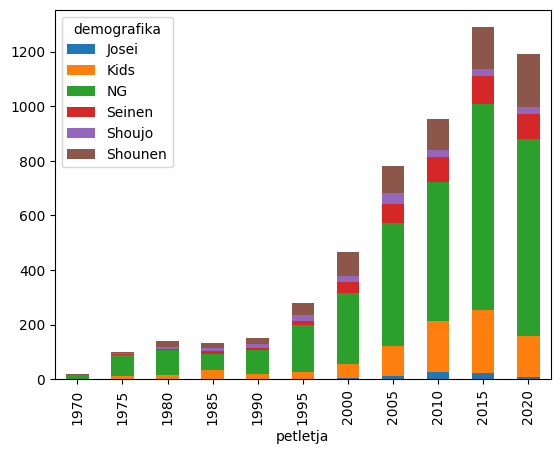

In [10]:
podtabela_po_letih = VSI_ANIME[["naslov", "leto premiere", "ocena", "demografika", "člani", "vir"]].copy()

def petletje(x):
    if x % 10 >= 5:
        return (x // 10) * 10 + 5
    return (x // 10) * 10

podtabela_po_letih["petletja"] = podtabela_po_letih["leto premiere"].apply(petletje)

petletni_podatki = pd.crosstab(
    index = podtabela_po_letih["petletja"],
    columns = podtabela_po_letih["demografika"]
)
petletni_podatki.plot(kind = "bar", stacked = True)

A mi to karkoli pove, glede na to kako veliko je NG stvari? Morda z žanri naredim nekaj podobnega?
Mogla bi se vprašati, kaj bi sploh rada ugotovila.

<Axes: xlabel='demografika'>

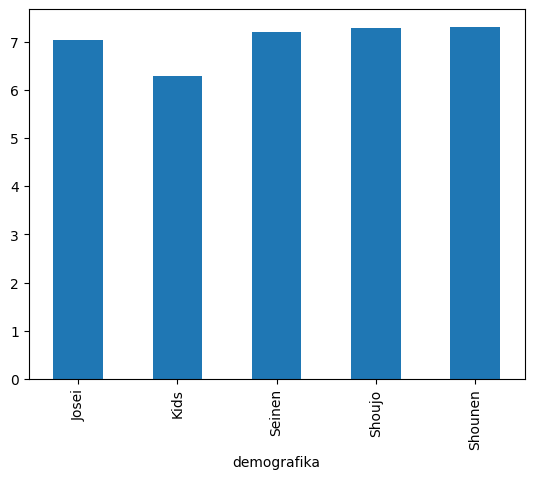

In [11]:
# Povprečna ocena po demografiki
filter_demo = podtabela_po_letih["demografika"] != "NG"
podtabela_demo = podtabela_po_letih[filter_demo]

podtabela_demo.groupby("demografika")["ocena"].mean().plot.bar()

# Zanimivo, da ni razlike v resnici.

demografika
Kids       6.291492
NG         6.717243
Josei      7.030000
Seinen     7.207146
Shoujo     7.275372
Shounen    7.304505
Name: ocena, dtype: float64


<Axes: xlabel='demografika'>

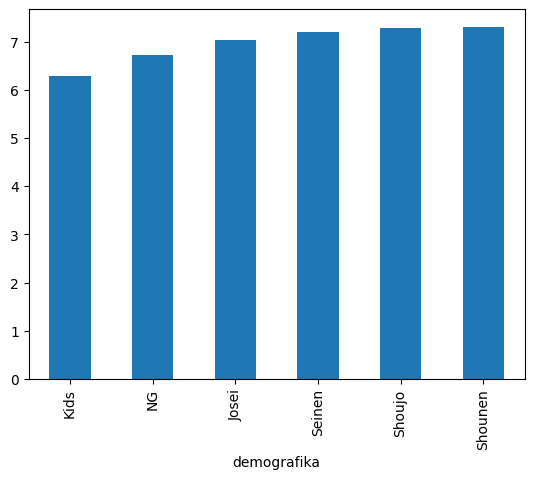

In [12]:
print(podtabela_po_letih.groupby("demografika")["ocena"].mean().sort_values())
podtabela_po_letih.groupby("demografika")["ocena"].mean().sort_values().plot.bar() # Morda mi je pa tale bolj všeč. Pa raje bi, da še izpiše.

<Axes: xlabel='petletja'>

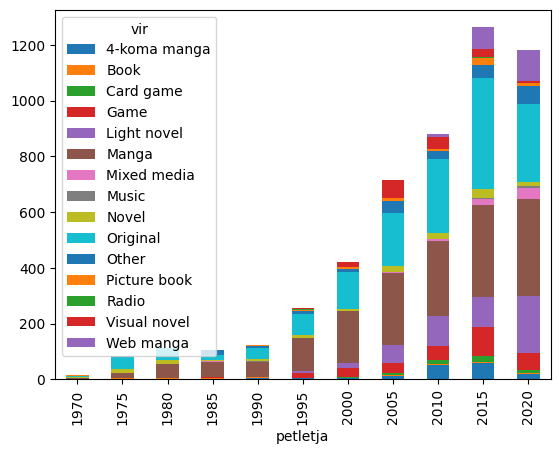

In [13]:
# Kaj pa enake stvari po virih?

petletni_podatki_viri = pd.crosstab(
    index = podtabela_po_letih["petletja"],
    columns = podtabela_po_letih["vir"]
)
petletni_podatki_viri.plot(kind = "bar", stacked = True)

In [14]:
podtabela_po_letih.groupby("vir").size().sort_values()

vir
Radio              5
Music             16
Book              36
Card game         49
Picture book      71
                ... 
Other            235
Game             311
Light novel      512
Original        1490
Manga           1689
Length: 15, dtype: int64

<Axes: xlabel='vir'>

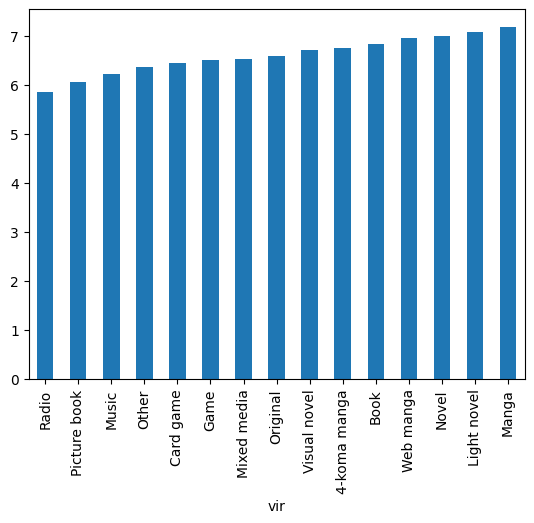

In [15]:
podtabela_po_letih.groupby("vir")["ocena"].mean().sort_values().plot.bar()

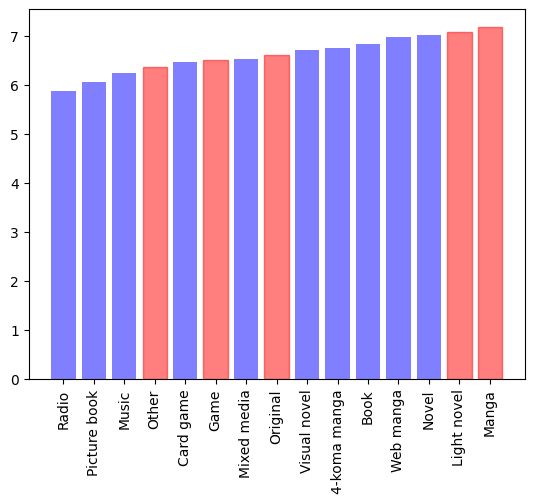

In [16]:
df_viri = pd.DataFrame(podtabela_po_letih["vir"])

df_viri2 = pd.DataFrame({"povpr_o": podtabela_po_letih.groupby("vir")["ocena"].mean().sort_values()})

import matplotlib.pyplot as plt

def plot_color_label(data, target):
    bars = plt.bar(x=data.index, height=data.povpr_o, color='blue', alpha=0.5)
    for idx, word in enumerate(data.index):
        if word in target:
            bars[idx].set_color(c='red')
    plt.xticks(rotation = 90)

popularni_viri = ["Manga", "Original", "Light novel", "Game", "Other"]

plot_color_label(df_viri2, popularni_viri)

             število * 100  člani * 10**7  povprečna ocena
demografika                                               
Josei                 0.78       0.881805         7.030000
Kids                  8.43       0.428274         6.291492
Seinen                4.32       8.938597         7.207146
Shoujo                1.93       3.129173         7.275372
Shounen               7.70      25.345100         7.304505


<Axes: xlabel='demografika'>

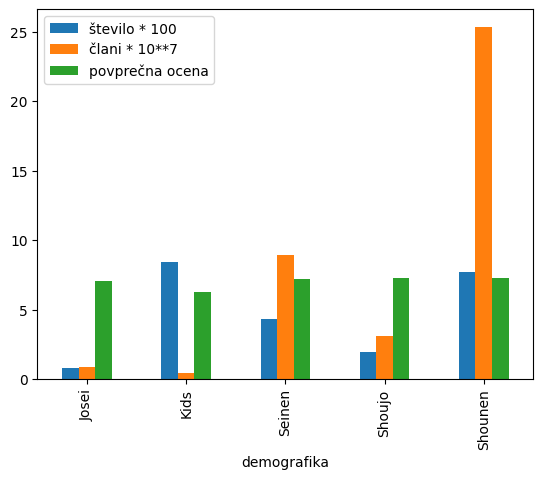

In [17]:
df_demo2 = pd.DataFrame({"število * 100": podtabela_demo.groupby("demografika").size() / 100,
                         "člani * 10**7": podtabela_demo.groupby("demografika")["člani"].sum() / 10000000, 
                         "povprečna ocena": podtabela_demo.groupby("demografika")["ocena"].mean()})

print(df_demo2)

# Razmerje med številom in člani in povprečna ocena in to

df_demo2.plot(kind = "bar", stacked = False)

# Lahko bi naredila v bolj pravih številkah in vrgla ven povprečno oceno, če dam to za tisto, kjer se že vidi približno enaka povprečna ocena.

In [18]:
# Alpa se nardi neke plote različnih barv, pač za vsako to. Za ocene in za popularnost/člane po petletkah. Za sho in sei demografike

filter_josei = podtabela_po_letih["demografika"] == "Josei"
filter_shoujo = podtabela_po_letih["demografika"] == "Shoujo"
filter_seinen = podtabela_po_letih["demografika"] == "Seinen"
filter_shounen = podtabela_po_letih["demografika"] == "Shounen"

podtabela_josei = podtabela_po_letih[filter_josei]
podtabela_shoujo = podtabela_po_letih[filter_shoujo]
podtabela_seinen = podtabela_po_letih[filter_seinen]
podtabela_shounen = podtabela_po_letih[filter_shounen]

df_josei = pd.DataFrame({
    "Josei povprečna ocena": podtabela_josei.groupby("petletja")["ocena"].mean(),
    "Josei število": podtabela_josei.groupby("petletja").size(),
    "Josei člani": podtabela_josei.groupby("petletja")["člani"].sum()
})

print(df_josei)

df_shoujo = pd.DataFrame({
    "Shoujo povprečna ocena": podtabela_shoujo.groupby("petletja")["ocena"].mean(),
    "Shoujo število": podtabela_shoujo.groupby("petletja").size(),
    "Shoujo člani": podtabela_shoujo.groupby("petletja")["člani"].sum()
})

print(df_shoujo)

df_seinen = pd.DataFrame({
    "Seinen povprečna ocena": podtabela_seinen.groupby("petletja")["ocena"].mean(),
    "Seinen število": podtabela_seinen.groupby("petletja").size(),
    "Seinen člani": podtabela_seinen.groupby("petletja")["člani"].sum()
})

print(df_seinen)

df_shounen = pd.DataFrame({
    "Shounen povprečna ocena": podtabela_shounen.groupby("petletja")["ocena"].mean(),
    "Shounen število": podtabela_shounen.groupby("petletja").size(),
    "Shounen člani": podtabela_shounen.groupby("petletja")["člani"].sum()
})

print(df_shounen)


          Josei povprečna ocena  Josei število  Josei člani
petletja                                                   
1995                   6.805000              2        71810
2000                   7.004000              5       115015
2005                   7.458333             12      1663325
2010                   7.114444             27      4312391
2015                   6.753636             22      2103171
2020                   6.935000             10       552337
          Shoujo povprečna ocena  Shoujo število  Shoujo člani
petletja                                                      
1975                    7.395000               4        143671
1980                    6.938889               9         72035
1985                    6.718000              10         37260
1990                    7.276429              14        896969
1995                    7.356818              22       1470162
2000                    7.284091              22       2071989
2005            

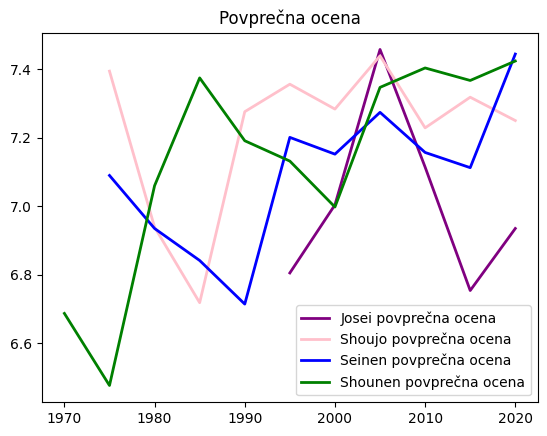

In [19]:
plt.plot(
    df_josei.index, 'Josei povprečna ocena', data=df_josei,
    color='purple',
    linewidth=2
)

plt.plot(
    df_shoujo.index, 'Shoujo povprečna ocena', data=df_shoujo,
    color='pink',
    linewidth=2
)

plt.plot(
    df_seinen.index, 'Seinen povprečna ocena', data=df_seinen,
    color='blue',
    linewidth=2
)

plt.plot(
    df_shounen.index, 'Shounen povprečna ocena', data=df_shounen,
    color='green',
    linewidth=2
)

plt.legend()
plt.title("Povprečna ocena")
plt.show()


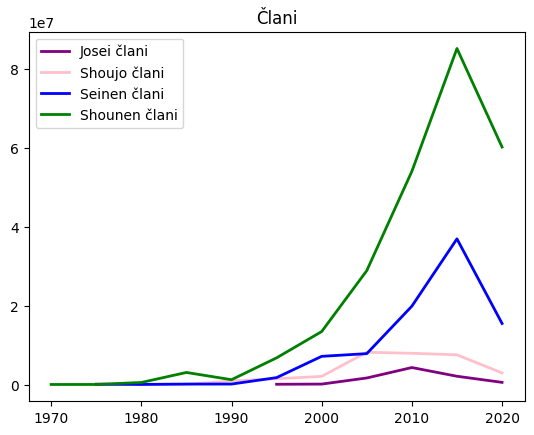

In [20]:
plt.plot(
    df_josei.index, 'Josei člani', data=df_josei,
    color='purple',
    linewidth=2
)

plt.plot(
    df_shoujo.index, 'Shoujo člani', data=df_shoujo,
    color='pink',
    linewidth=2
)

plt.plot(
    df_seinen.index, 'Seinen člani', data=df_seinen,
    color='blue',
    linewidth=2
)

plt.plot(
    df_shounen.index, 'Shounen člani', data=df_shounen,
    color='green',
    linewidth=2
)

plt.legend()
plt.title("Člani")
plt.show()

In [21]:
najboljsi = ocene.sort_values("ocena", ascending=False)
najboljsi.head(10)

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
52991,Sousou no Frieren,28,fall,2023,Manga,24,9.34,817774,Shounen,[],"['Adventure', 'Drama', 'Fantasy']",['Madhouse']
5114,Fullmetal Alchemist: Brotherhood,64,spring,2009,Manga,24,9.09,3381374,Shounen,['Military'],"['Action', 'Adventure', 'Drama', 'Fantasy']",['Bones']
9253,Steins;Gate,24,spring,2011,Visual novel,24,9.07,2590030,NG,"['Psychological', 'Time Travel']","['Drama', 'Sci-Fi', 'Suspense']",['White Fox']
28977,Gintama°,51,spring,2015,Manga,24,9.06,638181,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Bandai Namco Pictures']
38524,Shingeki no Kyojin Season 3 Part 2,10,spring,2019,Manga,23,9.05,2312316,Shounen,"['Gore', 'Military', 'Survival']","['Action', 'Drama', 'Suspense']",['Wit Studio']
9969,Gintama&#039;,51,spring,2011,Manga,24,9.03,562830,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Sunrise']
11061,Hunter x Hunter (2011),148,fall,2011,Manga,23,9.03,2872330,Shounen,[],"['Action', 'Adventure', 'Fantasy']",['Madhouse']
15417,Gintama&#039;: Enchousen,13,fall,2012,Manga,24,9.02,328844,Shounen,"['Gag Humor', 'Historical', 'Parody', 'Samurai']","['Action', 'Comedy', 'Sci-Fi']",['Sunrise']
41467,Bleach: Sennen Kessen-hen,13,fall,2022,Manga,24,9.01,558114,Shounen,[],"['Action', 'Adventure', 'Fantasy']",['Pierrot']


In [122]:
najpopularnejsi = VSI_ANIME.sort_values("člani", ascending=False)
najpopularnejsi.head(10)

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
16498,Shingeki no Kyojin,25,spring,2013,Manga,24,8.55,3990574,Shounen,"['Gore', 'Military', 'Survival']","['Action', 'Award Winning', 'Drama', 'Suspense']",['Wit Studio']
1535,Death Note,37,fall,2006,Manga,23,8.62,3944392,Shounen,['Psychological'],"['Supernatural', 'Suspense']",['Madhouse']
5114,Fullmetal Alchemist: Brotherhood,64,spring,2009,Manga,24,9.09,3381374,Shounen,['Military'],"['Action', 'Adventure', 'Drama', 'Fantasy']",['Bones']
30276,One Punch Man,12,fall,2015,Web manga,24,8.49,3254079,Seinen,"['Adult Cast', 'Parody', 'Super Power']","['Action', 'Comedy']",['Madhouse']
11757,Sword Art Online,25,summer,2012,Light novel,23,7.21,3099024,NG,"['Love Polygon', 'Video Game']","['Action', 'Adventure', 'Fantasy', 'Romance']",['A-1 Pictures']
38000,Kimetsu no Yaiba,26,spring,2019,Manga,23,8.46,3080000,Shounen,['Historical'],"['Action', 'Award Winning', 'Fantasy']",['ufotable']
31964,Boku no Hero Academia,13,spring,2016,Manga,24,7.86,3054962,Shounen,"['School', 'Super Power']",['Action'],['Bones']
20,Naruto,220,fall,2002,Manga,23,8.00,2881809,Shounen,['Martial Arts'],"['Action', 'Adventure', 'Fantasy']",['Pierrot']
11061,Hunter x Hunter (2011),148,fall,2011,Manga,23,9.03,2872330,Shounen,[],"['Action', 'Adventure', 'Fantasy']",['Madhouse']


<Axes: xlabel='sezona'>

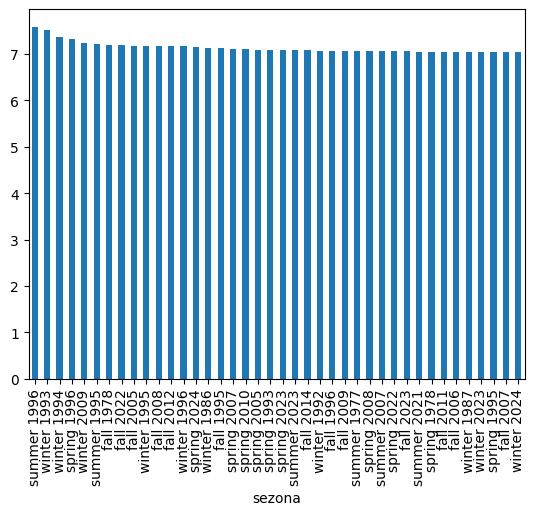

In [22]:
# Naredim za foro še najboljše sezone? Naredim stolpec, kjer je cela sezona (sezona + leto) in pol dataframe z groupbyji (ocena, število naslovov ...) (vsi_anime)
# Sam jih je dvesto. tkoda to bi bla sam tabela, razvrščeno po oceni in pol, kaj je.

podtabela_sezone = VSI_ANIME[["sezona premiere", "leto premiere", "ocena", "člani"]].copy()
podtabela_sezone["sezona"] = podtabela_sezone["sezona premiere"] + ' ' + podtabela_sezone["leto premiere"].apply(str)

podtabela_sezone.groupby("sezona")["ocena"].mean().sort_values(ascending=False).head(40).plot.bar()
# Naredim raje cel un plot in dodam še barve za vse po 2000

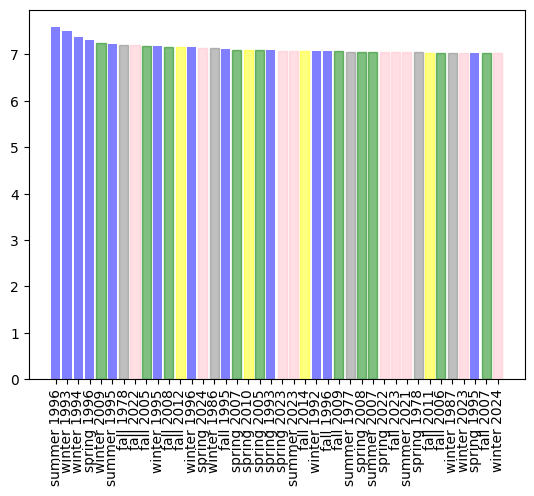

In [23]:
def plot_color_sezone(data):
    bars = plt.bar(x=data.index, height=data.ocena, color='blue', alpha=0.5)
    for idx, sezona in enumerate(data.index):
        sez, leto = sezona.split()
        if int(leto) < 1990:
            bars[idx].set_color(c="grey")
        if 2010 > int(leto) >= 2000:
            bars[idx].set_color(c='green')
        if 2020 > int(leto) >= 2010:
            bars[idx].set_color(c="yellow")
        if int(leto) >= 2020:
            bars[idx].set_color(c="pink")
    plt.xticks(rotation = 90)

df_sezone = pd.DataFrame({
    "ocena": podtabela_sezone.groupby("sezona")["ocena"].mean().sort_values(ascending=False).head(40)
})

plot_color_sezone(df_sezone)

Interpretacija podatkov ?

<Axes: xlabel='člani', ylabel='ocena'>

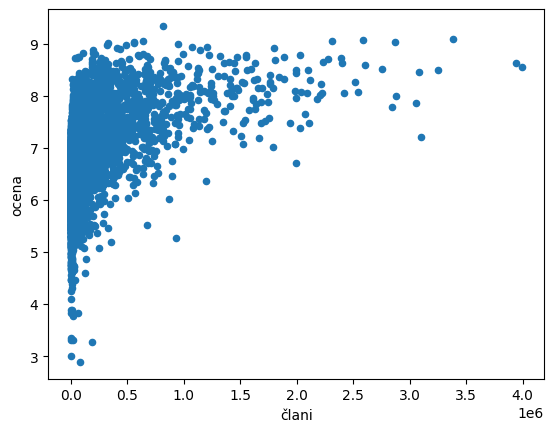

In [24]:
VSI_ANIME.plot.scatter(x="člani", y="ocena") # Kaj mi to pove? :P

In [120]:
VSI_ANIME[(VSI_ANIME["ocena"] < 6) & (VSI_ANIME["člani"] > 800000)]

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
39617,Yakusoku no Neverland 2nd Season,11,winter,2021,Manga,22,5.27,934160,Shounen,"['Psychological', 'Survival']","['Fantasy', 'Sci-Fi', 'Suspense']",['CloverWorks']


In [128]:
VSI_ANIME[(VSI_ANIME["ocena"] < 7) & (VSI_ANIME["člani"] > 1800000)]

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
21881,Sword Art Online II,24,summer,2014,Light novel,23,6.71,1993099,NG,"['Love Polygon', 'Video Game']","['Action', 'Adventure', 'Fantasy', 'Romance']",['A-1 Pictures']


In [129]:
VSI_ANIME[(VSI_ANIME["ocena"] < 7.5) & (VSI_ANIME["člani"] > 3000000)]

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
11757,Sword Art Online,25,summer,2012,Light novel,23,7.21,3099024,NG,"['Love Polygon', 'Video Game']","['Action', 'Adventure', 'Fantasy', 'Romance']",['A-1 Pictures']


In [124]:
najboljsi.tail(5)

,naslov,število epizod,sezona premiere,leto premiere,vir,dolzina epizode v minutah,ocena,člani,demografika,teme,žanri,studii
id,,,,,,,,,,,,
28929,Vampire Holmes,12,spring,2015,Game,3,3.31,21264,NG,[],"['Comedy', 'Mystery', 'Supernatural']",['Studio! Cucuri']
34223,Forest Fairy Five,13,winter,2017,Picture book,10,3.31,3832,NG,['Music'],"['Comedy', 'Fantasy']",[]
19315,Pupa,12,winter,2014,Manga,4,3.28,190769,NG,"['Gore', 'Psychological']","['Fantasy', 'Horror', 'Suspense']",['Studio Deen']
37448,Ladyspo,12,spring,2018,Original,4,3.01,4576,NG,['Team Sports'],"['Comedy', 'Sci-Fi', 'Sports']",['Brio Animation']
38853,Ex-Arm,12,winter,2021,Manga,23,2.89,82145,Seinen,[],"['Action', 'Sci-Fi']",['Visual Flight']


<Axes: xlabel='leto premiere', ylabel='ocena'>

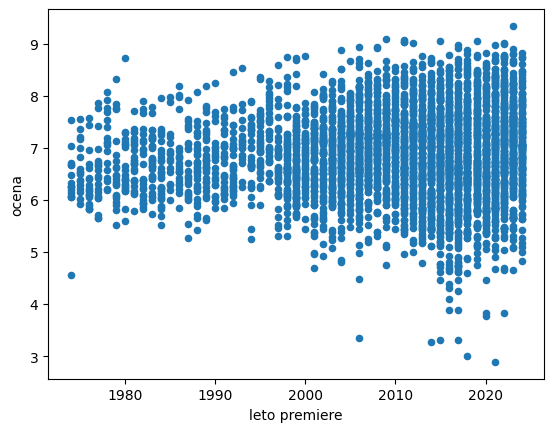

In [25]:
VSI_ANIME.plot.scatter(x="leto premiere", y="ocena")

<Axes: xlabel='leto premiere', ylabel='člani'>

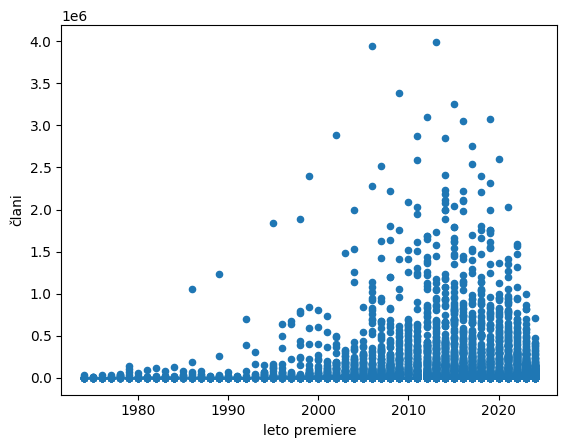

In [26]:
VSI_ANIME.plot.scatter(x="leto premiere", y="člani")

In [ ]:
# Nekje potem sepravi criss cross z žanri, demografikami, popularnostjo, oceno, DOLŽINO (sicer bo to treba s franšizami ...) - franšize so z anime.csv, ostalo bi šlo z vsi_anime.csv
# Studii, oznake ... česa še nimam ? 
# Ali se lahko brez dodatne csv tabel, tukaj v ipynb naredi slovar franšiz, kjer se dodeljuje pač indekse franšizam in so notri vsi id-ji iz related entries.
# Oziroma se doda stolpec z id_franšize. Kar je ubistvu s povezovalno tabelo lažje ... ?
# Kako bi to naredila? ?!

In [27]:
zanri_anime = pd.merge(ZANRI, VSI_ANIME, left_on="id", right_on="id")

<Axes: xlabel='zanr'>

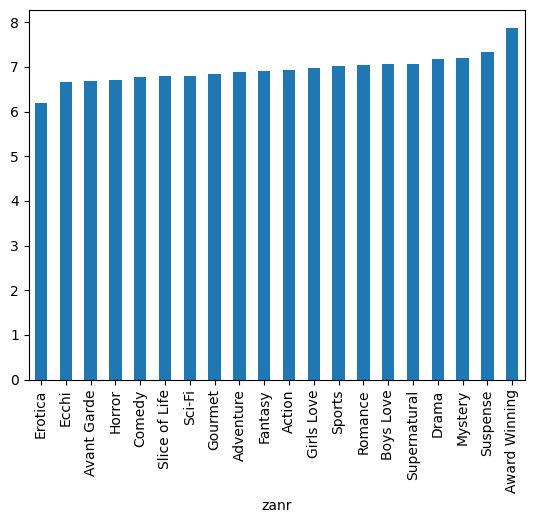

In [28]:
zanri_anime.groupby("zanr")["ocena"].mean().sort_values().plot.bar()  #weird, kaj nej s tem

In [139]:
zanri_najbolje_ocenjeni = set(zanri_anime.groupby("zanr")["ocena"].mean().sort_values(ascending=False).head(5).index.tolist())

{'Award Winning', 'Drama', 'Mystery', 'Supernatural', 'Suspense'}

<Axes: xlabel='zanr'>

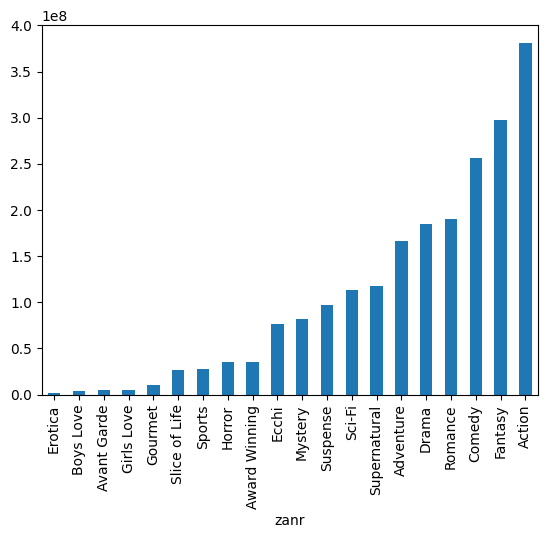

In [140]:
zanri_anime.groupby("zanr")["člani"].sum().sort_values().plot.bar()

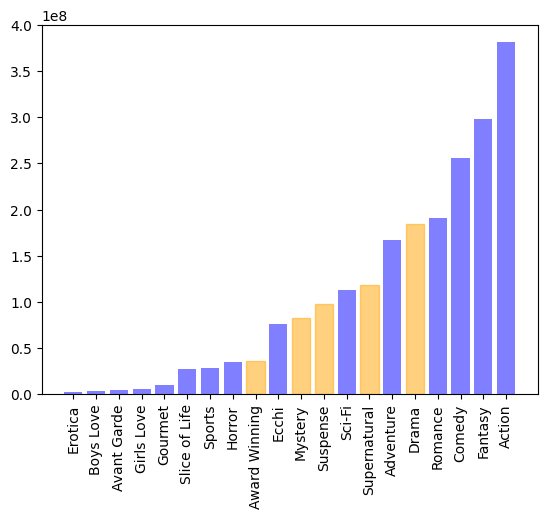

In [149]:
df_zanri_clani = pd.DataFrame({"clani": zanri_anime.groupby("zanr")["člani"].sum().sort_values()})
bars = plt.bar(x=df_zanri_clani.index, height=df_zanri_clani.clani, color='blue', alpha=0.5)
for idx, zanr in enumerate(df_zanri_clani.index):
    if zanr in zanri_najbolje_ocenjeni:
        bars[idx].set_color(c="orange")
plt.xticks(rotation=90)
plt.show()


In [155]:
zanri_najpopularnejsi = set(zanri_anime.groupby("zanr")["člani"].sum().sort_values(ascending=False).head(5).index.tolist())

<Axes: xlabel='zanr'>

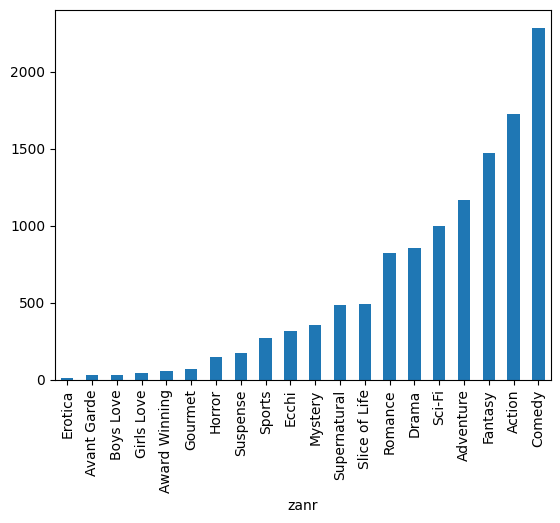

In [30]:
zanri_anime.groupby("zanr").size().sort_values().plot.bar()

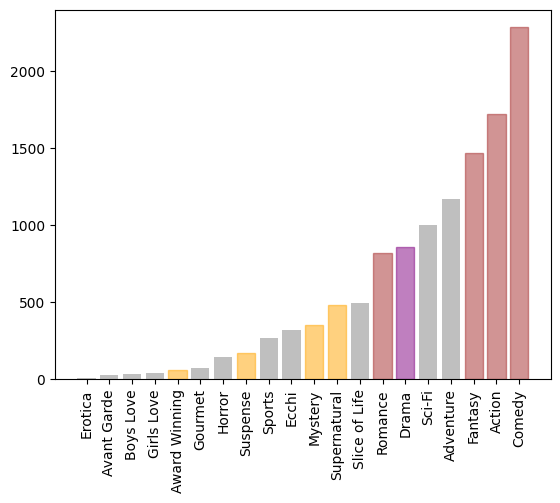

In [154]:
df_zanri_stevilo = pd.DataFrame({"stevilo": zanri_anime.groupby("zanr").size().sort_values()})
bars = plt.bar(x=df_zanri_stevilo.index, height=df_zanri_stevilo.stevilo, color='grey', alpha=0.5)
for idx, zanr in enumerate(df_zanri_stevilo.index):
    if zanr in zanri_najbolje_ocenjeni.intersection(zanri_najpopularnejsi):
        bars[idx].set_color(c="purple")
    elif zanr in zanri_najbolje_ocenjeni:
        bars[idx].set_color(c="orange")
    elif zanr in zanri_najpopularnejsi:
        bars[idx].set_color(c="brown")
plt.xticks(rotation=90)
plt.show()

               število * 10  člani * 10**6  povprečna ocena
zanr                                                       
Action                172.4     381.313437         6.926864
Adventure             116.8     166.504875         6.880067
Avant Garde             2.8       4.703772         6.680741
Award Winning           5.7      35.527962         7.879643
Boys Love               3.3       3.646838         7.058788
...                     ...            ...              ...
Sci-Fi                100.1     113.053098         6.803589
Slice of Life          49.4      26.751663         6.803505
Sports                 26.9      28.074805         7.013522
Supernatural           48.2     117.759667         7.059219
Suspense               17.2      97.390527         7.336845

[20 rows x 3 columns]


<Axes: xlabel='zanr'>

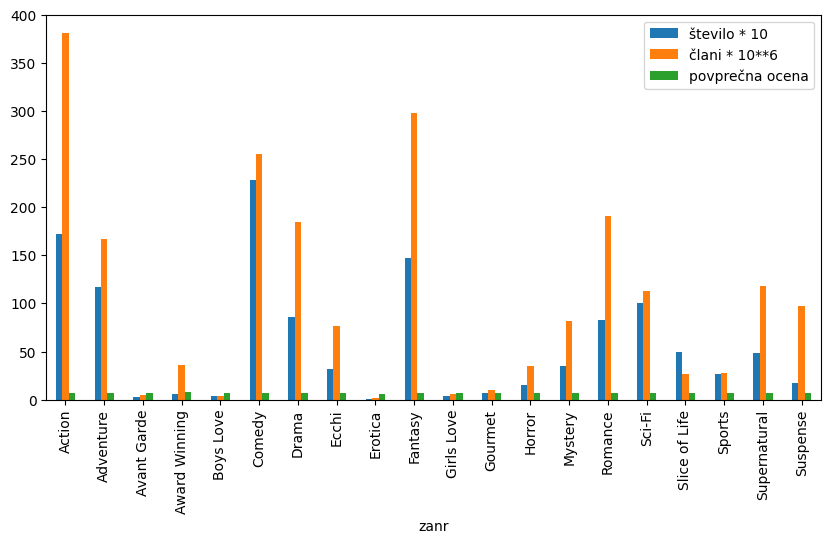

In [31]:
df_zanri = pd.DataFrame({"število * 10": zanri_anime.groupby("zanr").size() / 10,
                         "člani * 10**6": zanri_anime.groupby("zanr")["člani"].sum() / 1000000, 
                         "povprečna ocena": zanri_anime.groupby("zanr")["ocena"].mean()})

print(df_zanri)

df_zanri.plot(kind = "bar", stacked = False, figsize=(10, 5))

<Axes: ylabel='zanr'>

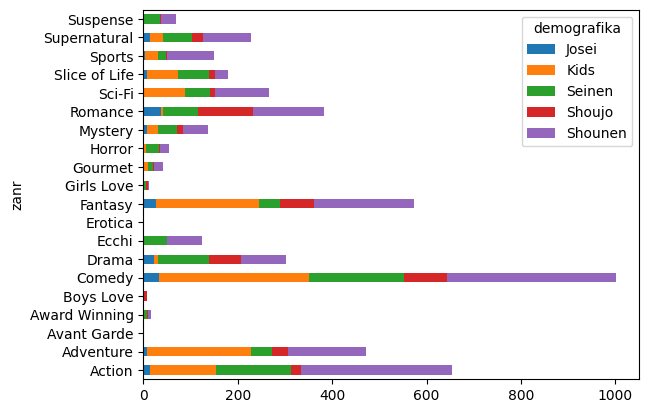

In [32]:
podtabela_zanri_demo = zanri_anime.copy()
podtabela_zanri_demo.drop(index=podtabela_zanri_demo[podtabela_zanri_demo['demografika'] == 'NG'].index, inplace=True)

ct_zanri_demo = pd.crosstab(
    index = podtabela_zanri_demo["zanr"],
    columns = podtabela_zanri_demo["demografika"]
)
ct_zanri_demo.plot(kind = "barh", stacked = True)

<Axes: ylabel='zanr'>

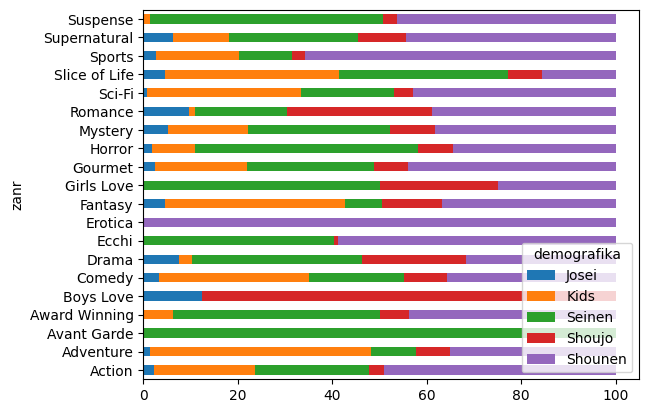

In [33]:
df_zanri_demo = pd.DataFrame(ct_zanri_demo)  #Če zgornje ne potrebuješ, popravi tudi to, da ne bo tako kar nekaj. Naprintaj si vse ct, df in spodnjo, če potrebuješ-

plotdata = df_zanri_demo.div(df_zanri_demo.sum(axis=1), axis=0) * 100 # Še razumi! To je zdaj v procentih pač, sprintaj si, da vidiš (oboje: df in plotdata)

plotdata.plot(kind="barh", stacked="True")

Kaj še lahko naredim z žanri?
Kaj vse lahko naredim s studii?
Franšiz se bom lotila, če bom imela dovolj časa. (?)
Ali lahko studie criss cross z demografikami in žanri in ocenami. Kateri studii so bolj "uspešni" - tisti, ki se ukvarjajo s čim?

<Axes: xlabel='leto premiere', ylabel='zanr'>

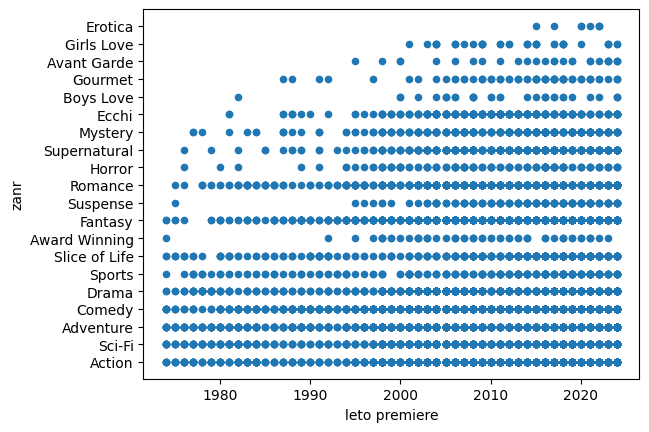

In [34]:
zanri_anime.plot.scatter(x="leto premiere", y="zanr")  # Če bi videl kaj tudi glede na količino ...

In [35]:
filter_studii = zanri_anime["studii"] != "[]"
zanri_studii = zanri_anime[filter_studii]

ct_zanri_studii = pd.crosstab(
    index = zanri_studii["studii"],
    columns = zanri_studii["zanr"]
)
ct_zanri_studii  # Razumi, kaj je crosstab

df_zanri_studii = pd.DataFrame(ct_zanri_studii)
df_zanri_studii["skupna"] = zanri_studii.groupby("studii").size()
df_zanri_studii = df_zanri_studii.sort_values("skupna", ascending=False)
najvecji_studii = df_zanri_studii.head(20)
najvecji_studii

zanr,Action,Adventure,Avant Garde,Award Winning,Boys Love,Comedy,Drama,Ecchi,Erotica,Fantasy,...,Gourmet,Horror,Mystery,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Suspense,skupna
studii,,,,,,,,,,,,,,,,,,,,,
['Toei Animation'],93,70,1,0,1,94,32,2,0,91,...,2,8,15,27,50,11,16,14,2,529
['Sunrise'],112,52,0,9,0,42,40,0,0,27,...,2,1,12,18,108,10,4,7,4,449
['J.C.Staff'],58,40,0,1,4,70,40,22,0,71,...,7,5,13,50,27,8,3,19,7,446
['Studio Deen'],55,34,0,0,11,74,37,11,0,51,...,1,12,20,24,21,14,3,30,7,411
['Madhouse'],58,41,5,6,1,47,54,10,0,36,...,0,10,18,23,36,7,10,20,21,404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
['SILVER LINK.'],17,4,1,0,0,30,4,10,0,20,...,1,1,3,19,5,8,1,8,1,134
['Doga Kobo'],9,3,0,2,0,38,8,6,0,13,...,1,0,4,13,2,7,2,8,0,120
['Satelight'],23,11,0,2,1,13,8,1,0,15,...,0,0,1,11,25,1,1,1,1,115


C:\Users\Uporabnik\AppData\Local\Temp\ipykernel_15144\1824415196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  najvecji_studii.drop('skupna', axis=1, inplace=True)


<Axes: ylabel='studii'>

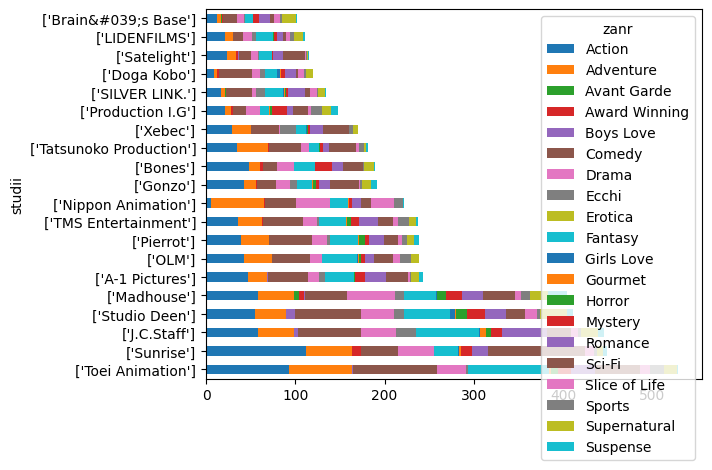

In [36]:
najvecji_studii.drop('skupna', axis=1, inplace=True)
najvecji_studii.plot(kind="barh", stacked=True)

<Axes: ylabel='studii'>

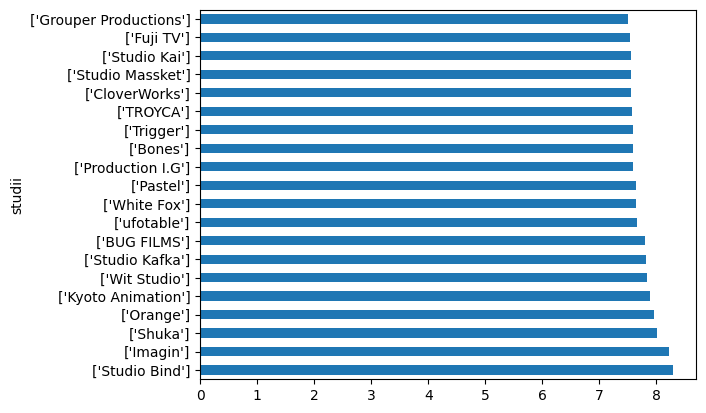

In [37]:
VSI_ANIME.groupby("studii")["ocena"].mean().sort_values(ascending=False).head(20).plot.barh()

<Axes: ylabel='studii'>

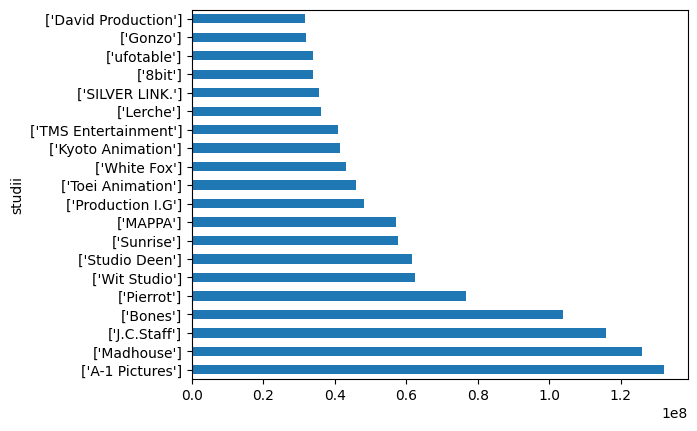

In [38]:
zanri_studii.groupby("studii")["člani"].sum().sort_values(ascending=False).head(20).plot.barh()  # To bi se dal kaj potem povezat s tistimi, ki imajo koga v top 10/15
# po popularnosti in po tem. Pač da se to mal pogleda. Kateri izmed top nevem kok, majo koga iz kle.

In [39]:
najpopularnejsih20 = VSI_ANIME.sort_values("člani", ascending=False).head(20)
najboljsih20 = najboljsi.head(20)

<Axes: ylabel='studii'>

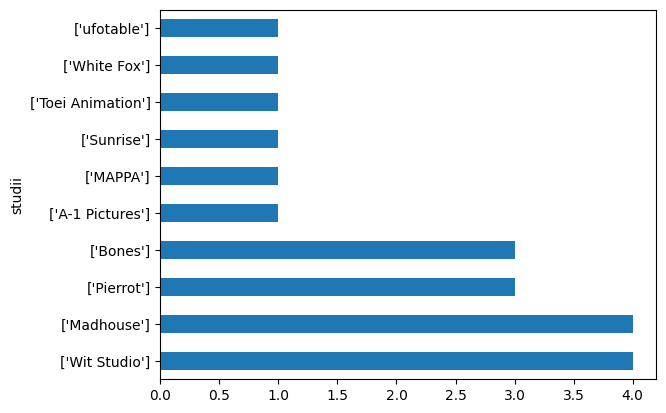

In [40]:
najpopularnejsih20.groupby("studii").size().sort_values(ascending=False).plot.barh()

<Axes: ylabel='studii'>

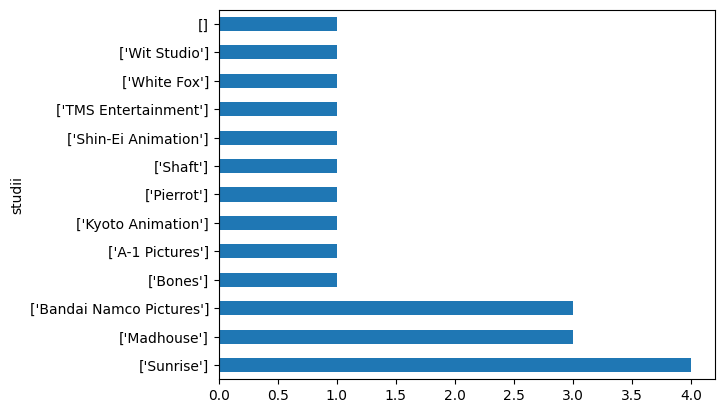

In [41]:
najboljsih20.groupby("studii").size().sort_values(ascending=False).plot.barh() # Ne da se mi posebi funkcije delat spet, da bi to pobarvala al kaj, ker nimam časa. Če bo čas.
# plus, mogla bi uredit te stringe, da se poreže ven oklepaje, ker vsaj na grafih, da ni za brez veze grdo ...
# Ojoj, sej za anime sem vzela ID studia zraven, samo nikol jih nisem iskala ... No, zdaj je prepozno.
# * Aja, ker sem itak imela dovolj problemov z animeji, kaj šele z liki, nisem šla še na studie.

In [ ]:
# Še pobarvamo. Se pravi, te, ki so v najpop, najbolj, oboje. Potem glede na največ animejev in še na oceno ali člane.
df_viri2 = pd.DataFrame({"povpr_o": podtabela_po_letih.groupby("vir")["ocena"].mean().sort_values()})

import matplotlib.pyplot as plt

def plot_color_label(data, target):
    bars = plt.bar(x=data.index, height=data.povpr_o, color='blue', alpha=0.5)
    for idx, word in enumerate(data.index):
        if word in target:
            bars[idx].set_color(c='red')
    plt.xticks(rotation = 90)

popularni_viri = ["Manga", "Original", "Light novel", "Game", "Other"]

plot_color_label(df_viri2, popularni_viri)

In [94]:
studii_najpopularnejsi = set(najpopularnejsih20["studii"].tolist())
studii_najboljsi = set(najboljsih20["studii"].tolist())
studii_najnaj = studii_najboljsi.intersection(studii_najpopularnejsi)

df_studii = pd.DataFrame({
    "clani": zanri_studii.groupby("studii")["člani"].sum(),
    "povprecna_ocena": zanri_studii.groupby("studii")["ocena"].mean(),
    "stevilo_anime_jev": zanri_studii.groupby("studii").size()
})

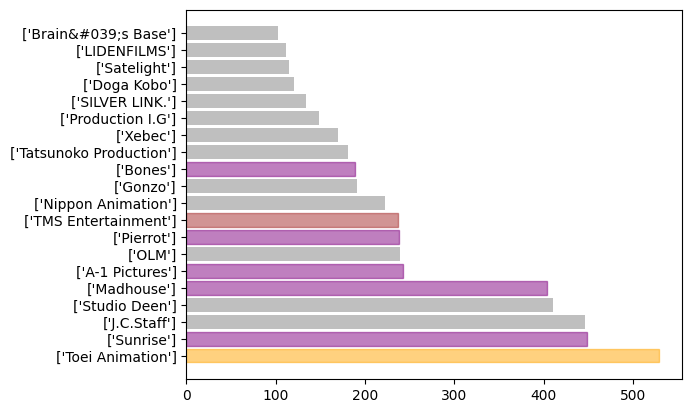

In [91]:
def plot_studii_stevilo(data, target_pop, target_bolj, target_najnaj):
    data = data.sort_values("stevilo_anime_jev", ascending=False).head(20)
    bars = plt.barh(y=data.index, width=data.stevilo_anime_jev, color='grey', alpha=0.5)
    for idx, studio in enumerate(data.index):
        if studio in target_najnaj:
            bars[idx].set_color(c='purple')
        elif studio in target_bolj:
            bars[idx].set_color(c="brown")
        elif studio in target_pop:
            bars[idx].set_color(c="orange")

plot_studii_stevilo(df_studii, studii_najpopularnejsi, studii_najboljsi, studii_najnaj)

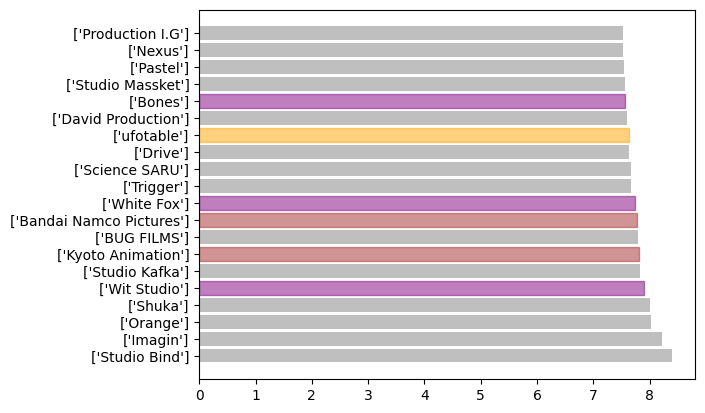

In [93]:
def plot_studii_ocena(data, target_pop, target_bolj, target_najnaj):
    data = data.sort_values("povprecna_ocena", ascending=False).head(20)
    bars = plt.barh(y=data.index, width=data.povprecna_ocena, color='grey', alpha=0.5)
    for idx, studio in enumerate(data.index):
        if studio in target_najnaj:
            bars[idx].set_color(c='purple')
        elif studio in target_bolj:
            bars[idx].set_color(c="brown")
        elif studio in target_pop:
            bars[idx].set_color(c="orange")

plot_studii_ocena(df_studii, studii_najpopularnejsi, studii_najboljsi, studii_najnaj)

In [99]:
studio_bind = VSI_ANIME["studii"] == "['Studio Bind']"
seznam_bind_anime = (VSI_ANIME[studio_bind])["naslov"].tolist()
print("Studio Bind: ", seznam_bind_anime)

imagin = VSI_ANIME["studii"] == "['Imagin']"
seznam_imagin = (VSI_ANIME[imagin])["naslov"].tolist()
print("Imagin: ", seznam_imagin)

orange = VSI_ANIME["studii"] == "['Orange']"
seznam_orange = (VSI_ANIME[orange])["naslov"].tolist()
print("Orange: ", seznam_orange)

shuka = VSI_ANIME["studii"] == "['Shuka']"
seznam_shuka = (VSI_ANIME[shuka])["naslov"].tolist()
print("Shuka: ", seznam_shuka)

Studio Bind:  ['Mushoku Tensei: Isekai Ittara Honki Dasu', 'Mushoku Tensei: Isekai Ittara Honki Dasu Part 2', 'Oniichan wa Oshimai!', 'Mushoku Tensei II: Isekai Ittara Honki Dasu', 'Mushoku Tensei II: Isekai Ittara Honki Dasu Part 2']
Imagin:  ['Ookami to Koushinryou']
Orange:  ['Houseki no Kuni', 'Beastars', 'Beastars 2nd Season', 'Trigun Stampede']
Shuka:  ['Durarara!!x2 Shou', 'Durarara!!x2 Ten', 'Durarara!!x2 Ketsu', '91 Days', 'Natsume Yuujinchou Go', 'Natsume Yuujinchou Roku', 'Housekishou Richard-shi no Nazo Kantei', 'Yuzuki-san Chi no Yonkyoudai.', 'Natsume Yuujinchou Shichi']


                      clani  povprecna_ocena  stevilo_anime_jev
studii                                                         
['8bit']           33853988         7.198152                 93
['A-1 Pictures']  132254218         7.349710                243
['A.C.G.T.']        5691111         6.813542                 48
['AIC ASTA']        6147016         7.263667                 30
['AIC']             7129301         6.873656                 93
...                     ...              ...                ...
['Zero-G']          4623649         6.826944                 39
['Zexcs']           9724030         6.768158                 76
['asread.']        10609954         6.806154                 29
['feel.']          18318589         6.933896                 77
['ufotable']       33770373         7.634894                 47

[86 rows x 3 columns]


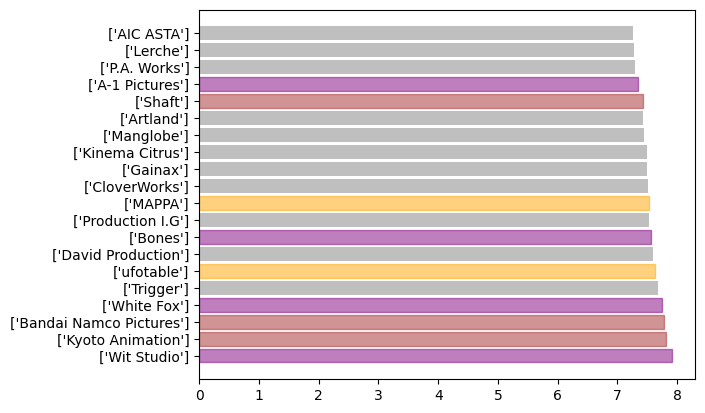

In [114]:
# Posebej studii, ki imajo vsaj 10 "izdelkov":
filter_vsaj_25 = df_studii.drop(index=df_studii[df_studii["stevilo_anime_jev"] < 25].index)
print(filter_vsaj_25)

plot_studii_ocena(filter_vsaj_25, studii_najpopularnejsi, studii_najboljsi, studii_najnaj)

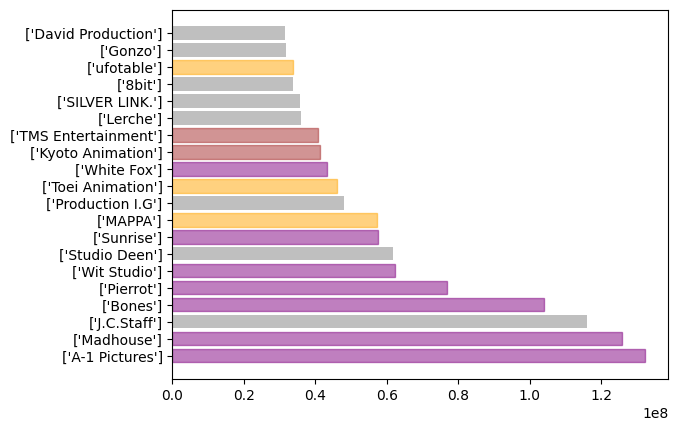

In [95]:
def plot_studii_clani(data, target_pop, target_bolj, target_najnaj):
    data = data.sort_values("clani", ascending=False).head(20)
    bars = plt.barh(y=data.index, width=data.clani, color='grey', alpha=0.5)
    for idx, studio in enumerate(data.index):
        if studio in target_najnaj:
            bars[idx].set_color(c='purple')
        elif studio in target_bolj:
            bars[idx].set_color(c="brown")
        elif studio in target_pop:
            bars[idx].set_color(c="orange")

plot_studii_clani(df_studii, studii_najpopularnejsi, studii_najboljsi, studii_najnaj)

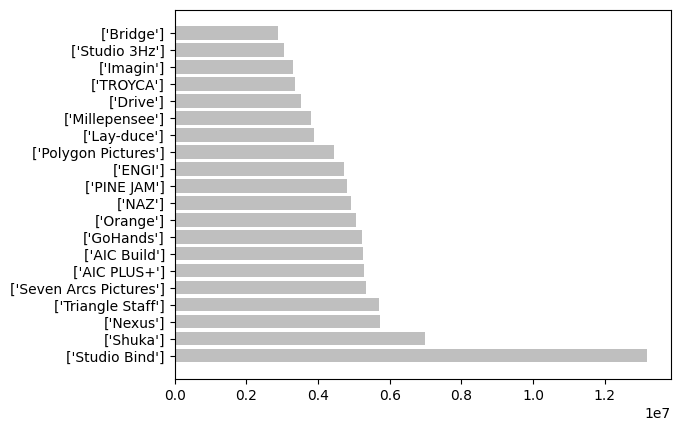

In [118]:
# Posebej studii, ki imajo manj produciranih
filter_max_25 = df_studii.drop(index=df_studii[df_studii["stevilo_anime_jev"] >= 25].index)

plot_studii_clani(filter_max_25, studii_najpopularnejsi, studii_najboljsi, studii_najnaj)

Ugotovi, kaj bi rada izvedela.

Za like je pa problem, ker nimam dovolj veliko podatkov (oz. podatkov iz novejših časov, ko je to razširjeno). In itak ničesar ne morem ugotoviti.

In [ ]:
# Te stvari bi bile uporabne, če bi imela več podatkov za anime (in franšize) in like.
# Aha torej ja, franšize so tko, da je vsaka vsaj v sami seb. Tkoda moram nekje še prefiltrirat stvari, k majo vsaj dve iz svoje pač.
# Pa grem najprej na like.

In [42]:
za_like1 = pd.merge(LIKI, ANIME_LIKI, left_on="id_lika", right_on="id_lika")
za_like2 = pd.merge(za_like1, ANIME, left_on="id_anime", right_on="id")
za_like = za_like2[["id_lika", "ime", "favoritizacije_lika", "id_anime", "vloga", "naslov", "ocena", "člani", "favoritizacije", "demografika"]]
za_like

,id_lika,ime,favoritizacije_lika,id_anime,vloga,naslov,ocena,člani,favoritizacije,demografika
0,8827,Heidi,105,2225,Main,Alps no Shoujo Heidi,7.38,38916,333,NG
1,30308,Alm-Onji,34,2225,Supporting,Alps no Shoujo Heidi,7.38,38916,333,NG
2,17787,Clara Sesemann,14,2225,Supporting,Alps no Shoujo Heidi,7.38,38916,333,NG
3,8828,Peter,12,2225,Supporting,Alps no Shoujo Heidi,7.38,38916,333,NG
4,30307,Rottenmeier,2,2225,Supporting,Alps no Shoujo Heidi,7.38,38916,333,NG
...,...,...,...,...,...,...,...,...,...,...
395,185028,Tubby,0,3823,Supporting,Little Lulu to Chicchai Nakama,6.42,1097,1,Kids
396,159502,Alvin,0,3823,Supporting,Little Lulu to Chicchai Nakama,6.42,1097,1,Kids
397,123509,Annie,0,3823,Supporting,Little Lulu to Chicchai Nakama,6.42,1097,1,Kids
398,89595,Pucchi,0,3823,Supporting,Little Lulu to Chicchai Nakama,6.42,1097,1,Kids


<Axes: xlabel='naslov'>

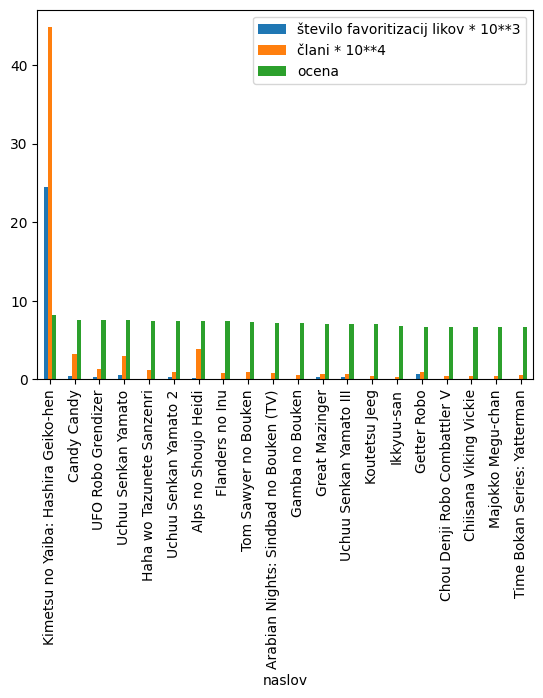

In [43]:
df_liki = pd.DataFrame({
    "število favoritizacij likov * 10**3": za_like.groupby("naslov")["favoritizacije_lika"].sum() / 1000,
    "člani * 10**4": za_like.groupby("naslov")["člani"].mean() / 10000,
    "ocena": za_like.groupby("naslov")["ocena"].mean(),
})

df_liki.sort_values("ocena", ascending=False).head(20).plot(kind="bar", stacked=False)

# Vprašanje kaj mi to pove in kako bi to nardila, da bi se kej lepga vidl. Itak zdej nimam podatkov. Kakšno razmerje?
# Jaz ne vidim nič lepega, ker nimam dovolj podatkov, tako da me je to tudi malo nehalo zanimati. Itak eno na drugo vpliva. Ali kaj želim izvedeti?

In [44]:
# še s filtri za supporting in main characterje.
filter_main = za_like["vloga"] == "Main"
liki_main = za_like[filter_main]
liki_supporting = za_like[~filter_main]

<Axes: xlabel='naslov'>

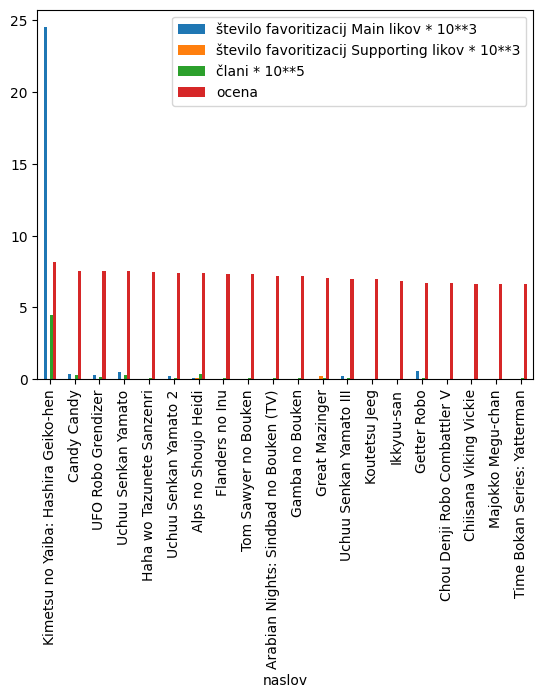

In [45]:
df_main_v_sup = pd.DataFrame({
    "število favoritizacij Main likov * 10**3": liki_main.groupby("naslov")["favoritizacije_lika"].sum() / 1000,
    "število favoritizacij Supporting likov * 10**3": liki_supporting.groupby("naslov")["favoritizacije_lika"].sum() / 1000,
    "člani * 10**5": za_like.groupby("naslov")["člani"].mean() / 100000,
    "ocena": za_like.groupby("naslov")["ocena"].mean(),
})

df_main_v_sup.sort_values("ocena", ascending=False).head(20).plot(kind="bar", stacked=False)

<Axes: xlabel='naslov'>

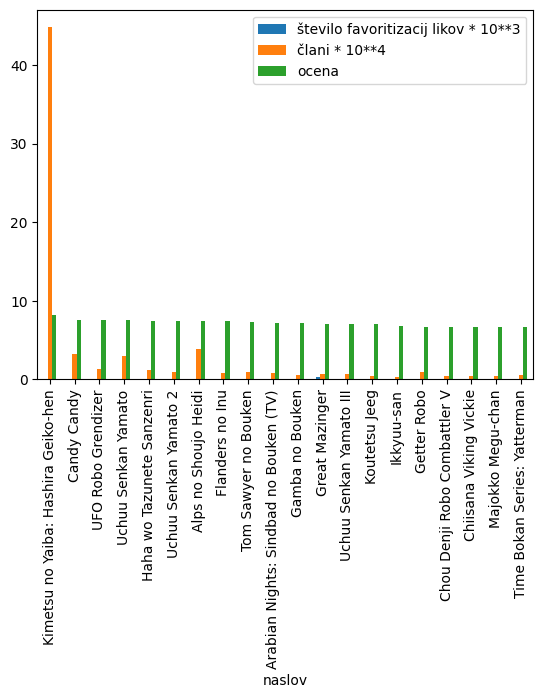

In [46]:
df_supporting = pd.DataFrame({
    "število favoritizacij likov * 10**3": liki_supporting.groupby("naslov")["favoritizacije_lika"].sum() / 1000,
    "člani * 10**4": liki_supporting.groupby("naslov")["člani"].mean() / 10000,
    "ocena": liki_supporting.groupby("naslov")["ocena"].mean(),
        "člani * 10**4": za_like.groupby("naslov")["člani"].mean() / 10000,
    "ocena": za_like.groupby("naslov")["ocena"].mean(),
})

df_supporting.sort_values("ocena", ascending=False).head(20).plot(kind="bar", stacked=False)

<Axes: xlabel='naslov'>

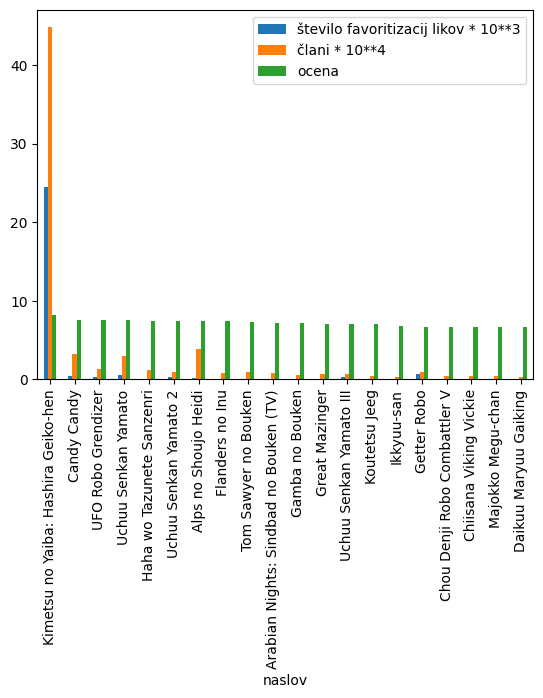

In [47]:
df_main = pd.DataFrame({
    "število favoritizacij likov * 10**3": liki_main.groupby("naslov")["favoritizacije_lika"].sum() / 1000,
    "člani * 10**4": liki_main.groupby("naslov")["člani"].mean() / 10000,
    "ocena": liki_main.groupby("naslov")["ocena"].mean(),
})

df_main.sort_values("ocena", ascending=False).head(20).plot(kind="bar", stacked=False)

Če bi imela dovolj podatkov, bi bilo zanimivo videti, kaj se zgodi.

In [48]:
# Franšize
FRANSIZE

,id_fransize,id_anime
0,2225,2225
1,3579,3579
2,3579,4486
3,6383,6383
4,3388,3388
...,...,...
898,46401,46402
899,30276,34134
900,30276,30276
901,55701,51019


In [49]:
fransize_anime = pd.merge(FRANSIZE, ANIME, left_on="id_anime", right_on="id")

df_fransize1 = pd.DataFrame(fransize_anime.groupby("id_fransize").size())
df_fransize1.drop(index=df_fransize1[df_fransize1[0] == 1].index, inplace=True)

samo_fransize = pd.merge(df_fransize1, fransize_anime, left_on="id_fransize", right_on="id_fransize")

ime_fransiz = samo_fransize[["id_fransize", "id_anime", "naslov"]].copy()
ime_fransiz.drop(index=ime_fransiz[ime_fransiz["id_fransize"] != ime_fransiz["id_anime"]].index, inplace=True)

# Narobe sem naredila!!!!!!!
# Se delamo, da je vse prav za danes.

samo_fransize = pd.merge(samo_fransize, ime_fransiz, left_on="id_fransize", right_on="id_fransize")
samo_fransize = samo_fransize[["id_fransize", "naslov_y", "id_anime_x", "naslov_x", "ocena", "število epizod", "vir", "leto premiere", "dolzina epizode v minutah", "demografika", "člani"]]
samo_fransize #naslov_y je naslov fransize

,id_fransize,naslov_y,id_anime_x,naslov_x,ocena,število epizod,vir,leto premiere,dolzina epizode v minutah,demografika,člani
0,80,Kidou Senshi Gundam,85,Kidou Senshi Zeta Gundam,7.88,50,Original,1985,24,NG,77335
1,80,Kidou Senshi Gundam,80,Kidou Senshi Gundam,7.75,43,Original,1979,25,NG,136212
2,80,Kidou Senshi Gundam,86,Kidou Senshi Gundam ZZ,6.65,47,Original,1986,24,NG,44767
3,1425,Lupin III: Part II,1426,Lupin III: Part III,7.28,50,Manga,1984,24,Seinen,23249
4,1425,Lupin III: Part II,1425,Lupin III: Part II,7.76,155,Manga,1977,25,Seinen,35887
...,...,...,...,...,...,...,...,...,...,...,...
95,31898,Robocar Poli,32221,Robocar Poli 2,5.63,26,Original,2012,11,Kids,472
96,38070,Kkoma Bus Tayo,38071,Kkoma Bus Tayo 2,5.62,26,Original,2011,11,Kids,390
97,38070,Kkoma Bus Tayo,38070,Kkoma Bus Tayo,5.73,26,Original,2010,11,Kids,505
98,48221,Bubble Bubble Cook,48221,Bubble Bubble Cook,NaN,52,Original,2010,23,Kids,159


<Axes: xlabel='naslov_y'>

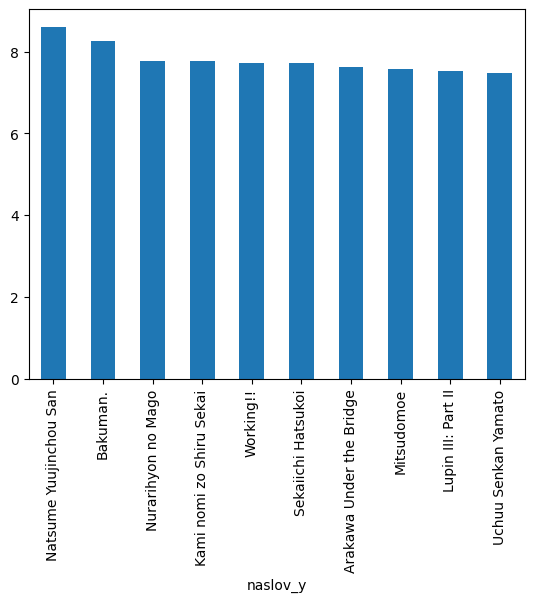

In [50]:
samo_fransize.groupby("naslov_y")["ocena"].mean().sort_values(ascending=False).head(10).plot.bar()

In [51]:
samo_fransize

,id_fransize,naslov_y,id_anime_x,naslov_x,ocena,število epizod,vir,leto premiere,dolzina epizode v minutah,demografika,člani
0,80,Kidou Senshi Gundam,85,Kidou Senshi Zeta Gundam,7.88,50,Original,1985,24,NG,77335
1,80,Kidou Senshi Gundam,80,Kidou Senshi Gundam,7.75,43,Original,1979,25,NG,136212
2,80,Kidou Senshi Gundam,86,Kidou Senshi Gundam ZZ,6.65,47,Original,1986,24,NG,44767
3,1425,Lupin III: Part II,1426,Lupin III: Part III,7.28,50,Manga,1984,24,Seinen,23249
4,1425,Lupin III: Part II,1425,Lupin III: Part II,7.76,155,Manga,1977,25,Seinen,35887
...,...,...,...,...,...,...,...,...,...,...,...
95,31898,Robocar Poli,32221,Robocar Poli 2,5.63,26,Original,2012,11,Kids,472
96,38070,Kkoma Bus Tayo,38071,Kkoma Bus Tayo 2,5.62,26,Original,2011,11,Kids,390
97,38070,Kkoma Bus Tayo,38070,Kkoma Bus Tayo,5.73,26,Original,2010,11,Kids,505
98,48221,Bubble Bubble Cook,48221,Bubble Bubble Cook,NaN,52,Original,2010,23,Kids,159


<Axes: xlabel='skupno število epizod', ylabel='povprečna ocena'>

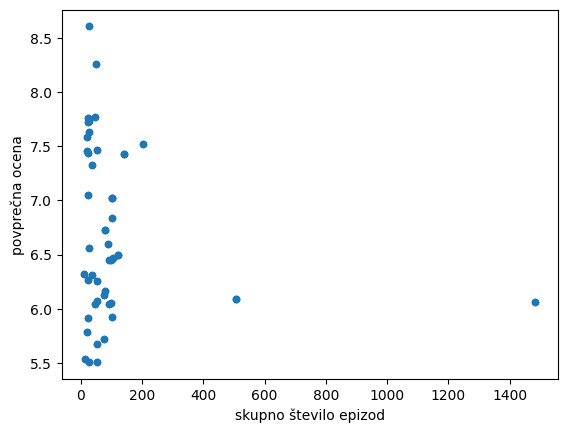

In [52]:
skupno_fransize = pd.DataFrame({
    "skupno število epizod": samo_fransize.groupby("naslov_y")["število epizod"].sum(),
    "povprečna ocena": samo_fransize.groupby("naslov_y")["ocena"].mean(),
    "skupni člani": samo_fransize.groupby("naslov_y")["člani"].sum()
    })

podatki_fransize = pd.merge(samo_fransize, skupno_fransize, left_on="naslov_y", right_on="naslov_y")
podatki_fransize.drop(index=podatki_fransize[podatki_fransize["povprečna ocena"].isna()].index, inplace=True)

podatki_fransize.plot.scatter(x="skupno število epizod", y="povprečna ocena")

<Axes: xlabel='skupno število epizod', ylabel='skupni člani'>

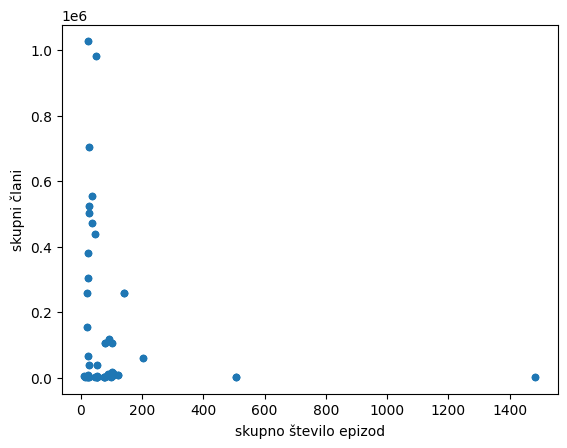

In [53]:
podatki_fransize.plot.scatter(x="skupno število epizod", y="skupni člani")